In [104]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/iris.csv')
df = df[['petal_length', 'petal_width']]
df

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


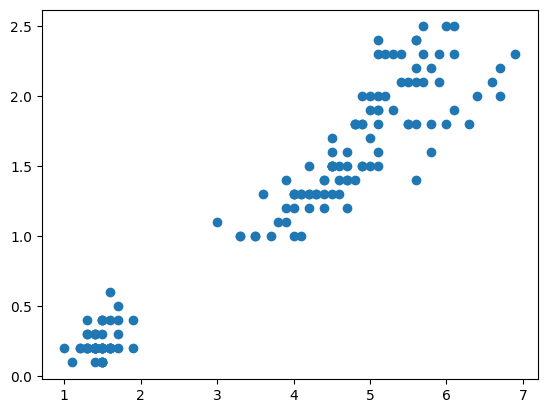

In [106]:
plt.scatter(df['petal_length'] , df['petal_width'])

In [107]:
scalar = MinMaxScaler()

scalar.fit(df[['petal_length']])
df[['petal_length_T']] = scalar.transform(df[['petal_length']])

scalar.fit(df[['petal_width']])
df[['petal_width_T']] = scalar.transform(df[['petal_width']])
df

,petal_length,petal_width,petal_length_T,petal_width_T
0,1.4,0.2,0.067797,0.041667
1,1.4,0.2,0.067797,0.041667
2,1.3,0.2,0.050847,0.041667
3,1.5,0.2,0.084746,0.041667
4,1.4,0.2,0.067797,0.041667
...,...,...,...,...
145,5.2,2.3,0.711864,0.916667
146,5.0,1.9,0.677966,0.750000
147,5.2,2.0,0.711864,0.791667
148,5.4,2.3,0.745763,0.916667


In [108]:
km = KMeans (n_clusters = 3)
y_predicted = km.fit_predict(df[['petal_length_T' , 'petal_width_T']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [109]:
df['cluster'] = y_predicted
df.head()

,petal_length,petal_width,petal_length_T,petal_width_T,cluster
0,1.4,0.2,0.067797,0.041667,1
1,1.4,0.2,0.067797,0.041667,1
2,1.3,0.2,0.050847,0.041667,1
3,1.5,0.2,0.084746,0.041667,1
4,1.4,0.2,0.067797,0.041667,1


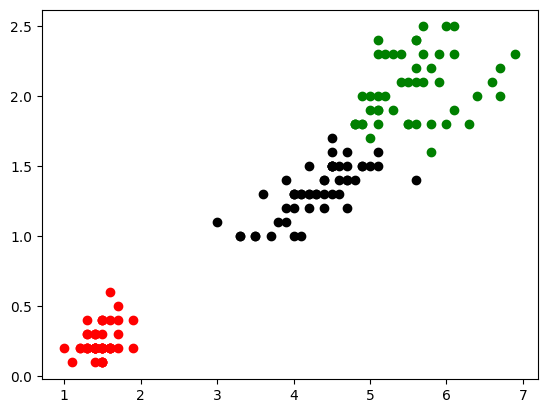

In [110]:
# Create separate DataFrames for each cluster
df1 = df[df['cluster'] == 0]  # DataFrame for cluster 0
df2 = df[df['cluster'] == 1]  # DataFrame for cluster 1
df3 = df[df['cluster'] == 2]  # DataFrame for cluster 2

# Create a scatter plot for each cluster with different colors
plt.scatter(df1['petal_length'], df1['petal_width'], color='green')  # Cluster 0 in green
plt.scatter(df2['petal_length'], df2['petal_width'], color='red')    # Cluster 1 in red
plt.scatter(df3['petal_length'], df3['petal_width'], color='black')   # Cluster 2 in black

In [111]:
def predict_iris_type(cluster):
    cluster_mapping = {
        0: 'Setosa',
        1: 'Versicolor',
        2: 'Virginica'
    }
    return cluster_mapping.get(cluster, 'Unknown')

df['predicted_iris_type'] = df['cluster'].apply(predict_iris_type)

df

,petal_length,petal_width,petal_length_T,petal_width_T,cluster,predicted_iris_type
0,1.4,0.2,0.067797,0.041667,1,Versicolor
1,1.4,0.2,0.067797,0.041667,1,Versicolor
2,1.3,0.2,0.050847,0.041667,1,Versicolor
3,1.5,0.2,0.084746,0.041667,1,Versicolor
4,1.4,0.2,0.067797,0.041667,1,Versicolor
...,...,...,...,...,...,...
145,5.2,2.3,0.711864,0.916667,0,Setosa
146,5.0,1.9,0.677966,0.750000,0,Setosa
147,5.2,2.0,0.711864,0.791667,0,Setosa
148,5.4,2.3,0.745763,0.916667,0,Setosa


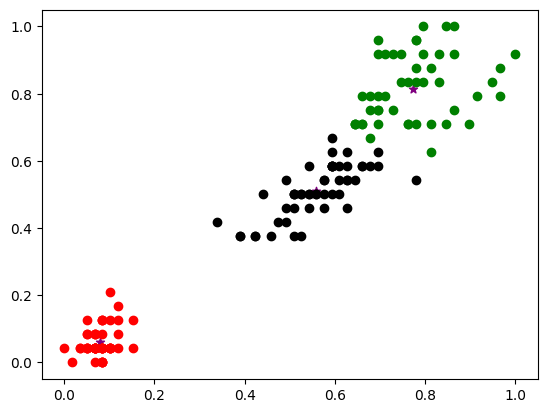

In [112]:
km.cluster_centers_

# Create separate DataFrames for each cluster
df1 = df[df['cluster'] == 0]  # DataFrame for cluster 0
df2 = df[df['cluster'] == 1]  # DataFrame for cluster 1
df3 = df[df['cluster'] == 2]  # DataFrame for cluster 2

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker="*")

# Create a scatter plot for each cluster with different colors
plt.scatter(df1['petal_length_T'], df1['petal_width_T'], color='green')  # Cluster 0 in green
plt.scatter(df2['petal_length_T'], df2['petal_width_T'], color='red')    # Cluster 1 in red
plt.scatter(df3['petal_length_T'], df3['petal_width_T'], color='black')   # Cluster 2 in black
